# NetworkX test

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
plt.ion() #turn on matplotlib interactive mode

## Generate dummy dataframe

In [59]:
df = pd.DataFrame(np.random.randint(1,100,size=(100, 3)), columns=['lead_id','buyer_id','weight'])

In [60]:
df['lead_id'] = df['lead_id'].astype(str) + '_lead'
df['buyer_id'] = df['buyer_id'].astype(str) + '_buyer'

In [61]:
df

,lead_id,buyer_id,weight
0,54_lead,37_buyer,54
1,36_lead,25_buyer,83
2,1_lead,77_buyer,39
3,73_lead,62_buyer,26
4,45_lead,98_buyer,92
5,79_lead,63_buyer,75
6,9_lead,21_buyer,88
7,81_lead,86_buyer,63
8,33_lead,25_buyer,51
9,45_lead,54_buyer,72


In [62]:
G = nx.from_pandas_edgelist(df,source='lead_id',target='buyer_id',edge_attr='weight',create_using=nx.Graph())
layout = nx.spring_layout(G,k = 5, iterations=50)

In [63]:
leads = list(df['lead_id'].unique())
buyers = list(df['buyer_id'].unique())

In [64]:
from networkx.algorithms import centrality

In [65]:
dc = centrality.degree_centrality(G)
degree_c = nx.degree_centrality(G)
degree_list = [ v for v in degree_c.values() ]

In [66]:
min(degree_list)

0.007936507936507936

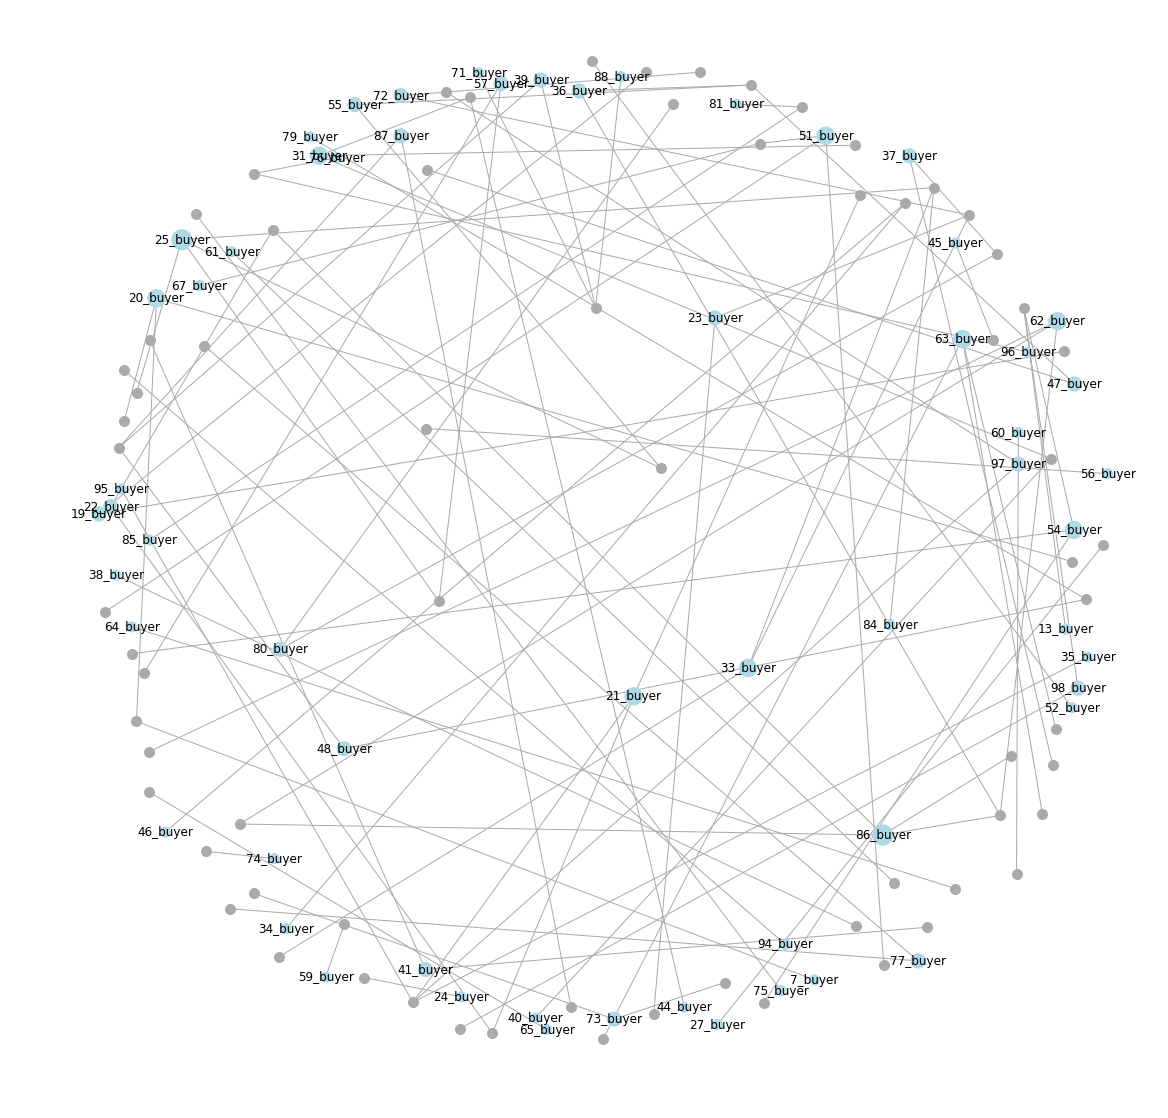

Wall time: 762 ms


In [67]:
%%time
plt.figure(figsize=(20, 20))

# 3. Draw the parts we want
nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')

buyers = [node for node in G.nodes() if node in df['buyer_id'].unique()]
size = [G.degree(node) * 100 for node in G.nodes() if node in df['buyer_id'].unique()]
nx.draw_networkx_nodes(G, layout, nodelist=buyers, node_size=size, node_color='lightblue')

leads = [node for node in G.nodes() if node in df['lead_id'].unique()]
nx.draw_networkx_nodes(G, layout, nodelist=leads, node_size=100, node_color='#AAAAAA')

#nx.draw_networkx_nodes(G, layout, nodelist=degree_c.keys(), node_size=100, node_color=degree_list, cmap=plt.cm.cividis, vmax=0.0975609756097561, vmin=0.012195121951219513)

buyers_dict = dict(zip(buyers, buyers))
nx.draw_networkx_labels(G, layout, labels=buyers_dict)

#leads_dict = dict(zip(leads, leads))
#nx.draw_networkx_labels(G, layout, labels=leads_dict)

plt.axis('off')

#plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [37]:
df.loc[df['buyer_id']==1]

,lead_id,buyer_id,weight
11,79,1,27
66,14,1,2
68,70,1,48


In [38]:
df.loc[df['lead_id']==1]

,lead_id,buyer_id,weight
48,1,68,16
